# Causal Stationary AR models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

## Causal Stationary AR(2) Example

Consider the AR(2) equation: 
\begin{equation*}
  y_t - 0.5 y_{t-1} + 0.25 y_{t-2} = \epsilon_t
\end{equation*}
Show that it has a causal stationary solution. Write the solution explicitly in terms of $\epsilon_t$. 

The characteristic polynomial corresponding to this equation is: $\phi(z) = 1 - 0.5 z + 0.25 z^2$. Its roots are easily seen to be $2 \exp(\pm i\pi/3)$ whose modulus equals 2. Since the modulus is strictly larger than 1, this AR(2) equation admits a causal stationary solution. To express the solution explicitly in terms of $\{\epsilon_t\}$, we first write: 
\begin{equation*}
   \phi(z) = \left(1 - 0.5 \exp(i \pi/3) z \right)\left(1 - 0.5 \exp(-i \pi/3) z \right)
\end{equation*}
so that 
\begin{align*}
  y_t &= \frac{1}{\phi(B)} \epsilon_t \\ &= \left(I - 0.5 \exp(i \pi/3) B \right)^{-1}\left(I - 0.5 \exp(-i \pi/3) B \right)^{-1} \epsilon_t \\ &= \left(\sum_{j=0}^{\infty} 0.5^j \exp(i j \pi/3) B^j \right)\left(\sum_{k=0}^{\infty} 0.5^k \exp(-i k \pi/3) B^k \right) \epsilon_t \\
  &= \sum_{j=0}^{\infty} \sum_{k=0}^{\infty} 0.5^{j+k} \exp \left(\frac{i(j-k)\pi}{3} \right) \epsilon_{t - j - k}. 
\end{align*}
A simpler expression for $y_t$ can be obtained using the following.  Let $a_1 = 0.5 \exp(i \pi/3)$ and $a_2 = 0.5 \exp(-i\pi/3)$. Check that
\begin{align*}
    \frac{1}{(1 - a_1 z)(1 - a_2 z)} = \frac{a_1}{(a_1 - a_2)(1 - a_1 z)} + \frac{a_2}{(a_2 - a_1) (1 - a_2 z)} = \frac{a_1}{a_1 - a_2} \sum_{j=0}^{\infty} (a_1 z)^j + \frac{a_2}{a_2 - a_1} \sum_{j=0}^{\infty} (a_2 z)^j = \sum_{j=0}^{\infty} \psi_j z^j
\end{align*}
where
\begin{align*}
   \psi_j = \frac{a_1^{j+1} - a_2^{j+1}}{a_1 - a_2} = (0.5)^{j+1}\frac{\exp((j+1)i\pi/3) - \exp(-(j+1)i\pi/3)}{0.5\exp(i\pi/3) - 0.5\exp(-i\pi/3)} = (0.5)^{j} \frac{\sin((j+1)\pi/3)}{\sin(\pi/3)} = \frac{2}{\sqrt{3}} (0.5)^{j} \sin \left( \frac{(j+1)\pi}{3} \right). 
\end{align*}
We thus  have
\begin{align*}
   y_t = \sum_{j=0}^{\infty} \psi_j \epsilon_{t-j} = \frac{2}{\sqrt{3}} \sum_{j=0}^{\infty} (0.5)^{j} \sin\left( \frac{(j+1)\pi}{3} \right) \epsilon_{t-j} .
\end{align*}
The above expression represents the given causal stationary AR(2) process as an infinite order MA (MA($\infty$)) process. Recall that the MA($q$) process is defined by $y_t = \mu + \sum_{j = 0}^q \theta_j \epsilon_{t-j}$ for some $q$. The above expression for $y_t$ is reminiscent of MA($q$) but with $q = \infty$. 


These $\psi_j$ coefficients decay rapidly with $j$ (because of the presence of $(0.5)^j$). Otherwise the process will not be causal-stationary. In the plot below, we plot the $\psi_j$ coefficients as a function of $j$. 

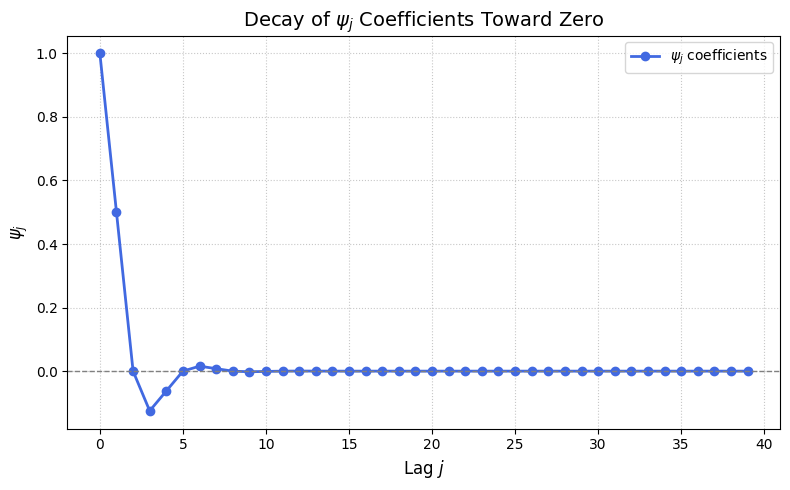

In [2]:
nlags = 40
psi_j = np.array([
    (2 / np.sqrt(3)) * (0.5) ** j * np.sin((j + 1) * np.pi / 3)
    for j in range(nlags)
])

plt.figure(figsize=(8, 5))
plt.plot(
    np.arange(nlags), psi_j, 
    marker='o', linestyle='-', linewidth=2, markersize=6, 
    color='royalblue', label=r'$\psi_j$ coefficients'
)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(r"Decay of $\psi_j$ Coefficients Toward Zero", fontsize=14)
plt.xlabel("Lag $j$", fontsize=12)
plt.ylabel(r"$\psi_j$", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

There is an inbuilt statsmodels function (shown  below) which gives the MA($\infty$) representation of every causal stationary AR($p$) (in fact for every causal stationary ARMA model; we will learn about ARMA models next week). Specifically, given coefficients $\phi_1, \dots \phi_p$ it outputs $\psi_0 = 1, \psi_1, \psi_2, \dots $ such that $y_t = \sum_{j=0}^{\infty} \psi_j \epsilon_{t-j}$ solves the AR($p$) equation: $y_t = \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \epsilon_t$. 

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess

ar = [1, -0.5, 0.25] # these are the phi-coefficients of the given AR process
ma = [1] 
# these are the theta-coefficients of the ARMA process 
# (since we are dealing with a pure AR process, there is no theta coefficient)

AR2_process = ArmaProcess(ar, ma)
nlags = 40

ma_infinity = AR2_process.arma2ma(lags = nlags) 
# this gives \psi_j, j = 0, \dots, lags-1

print(np.column_stack([psi_j, ma_infinity]))

[[ 1.00000000e+00  1.00000000e+00]
 [ 5.00000000e-01  5.00000000e-01]
 [ 3.53525080e-17  0.00000000e+00]
 [-1.25000000e-01 -1.25000000e-01]
 [-6.25000000e-02 -6.25000000e-02]
 [-8.83812699e-18  0.00000000e+00]
 [ 1.56250000e-02  1.56250000e-02]
 [ 7.81250000e-03  7.81250000e-03]
 [ 1.65714881e-18  0.00000000e+00]
 [-1.95312500e-03 -1.95312500e-03]
 [-9.76562500e-04 -9.76562500e-04]
 [-2.76191468e-19  0.00000000e+00]
 [ 2.44140625e-04  2.44140625e-04]
 [ 1.22070313e-04  1.22070312e-04]
 [ 1.68347800e-19  0.00000000e+00]
 [-3.05175781e-05 -3.05175781e-05]
 [-1.52587891e-05 -1.52587891e-05]
 [-6.47323754e-21  0.00000000e+00]
 [ 3.81469727e-06  3.81469727e-06]
 [ 1.90734863e-06  1.90734863e-06]
 [ 9.44013808e-22  0.00000000e+00]
 [-4.76837158e-07 -4.76837158e-07]
 [-2.38418579e-07 -2.38418579e-07]
 [-1.34859115e-22  0.00000000e+00]
 [ 5.96046448e-08  5.96046448e-08]
 [ 2.98023224e-08  2.98023224e-08]
 [ 1.89645631e-23  0.00000000e+00]
 [-7.45058060e-09 -7.45058060e-09]
 [-3.72529030e-09 -3

We can check from the above that the $\psi_j$ calculated by our formula (which we obtained by  using the Backshift method) coincide with the values output by the statsmodels function. 

## AR order selection through PACF

Consider the sunspots dataset to which we previously fit the AR(2) model. Now let us use PACF to see if there is another $p$ for which AR($p$) is a better model. 

        0     1    2  3  4
0  1700.5   8.3 -1.0 -1  1
1  1701.5  18.3 -1.0 -1  1
2  1702.5  26.7 -1.0 -1  1
3  1703.5  38.3 -1.0 -1  1
4  1704.5  60.0 -1.0 -1  1


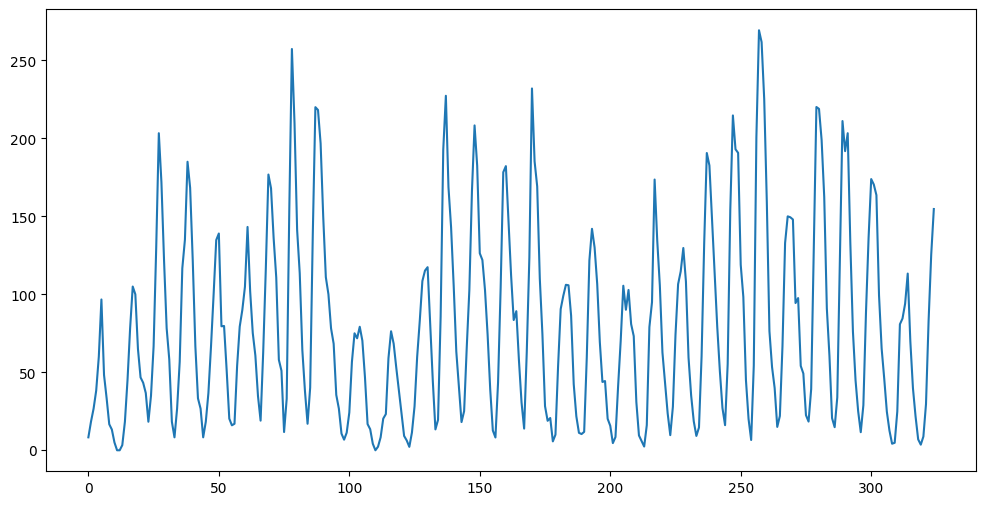

In [4]:
sunspots = pd.read_csv('SN_y_tot_V2.0.csv', header = None, sep = ';')
print(sunspots.head())

y = sunspots.iloc[:,1].values
n = len(y)
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.show()

The PACF can be plotted using the inbuilt function plot_pacf in statsmodels. 

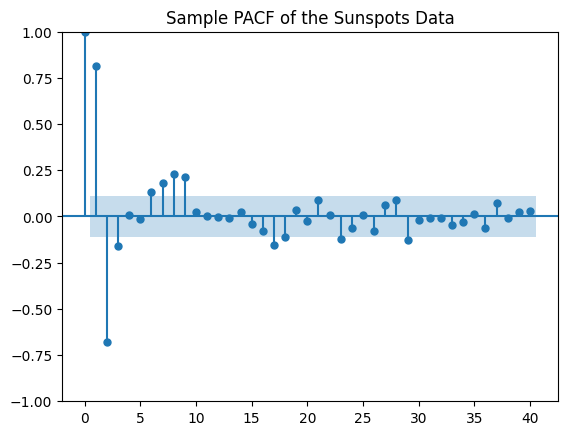

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

p_max = 40
plot_pacf(y, lags = p_max)
plt.title("Sample PACF of the Sunspots Data")
plt.show()

The partial PACF clearly has two big spikes at lags 1 and 2, and then mostly small. This suggests that an AR(2) model might be appropriate. One can also consider the sample PACF at lags 7, 8, 9 to be nonnegligible. In this case, we can try to fit AR(9) to the data. 

### Calculation of PACF

Let us see how the PACF is calculated. The definition of PACF($h$) is the estimate $\hat{\phi}_h$ of $\phi_h$ when the AR($h$) model is fit to the data.  Let us check if this is indeed the case. 

In [6]:
def sample_pacf(dt, p_max):
    pautocorr = []
    for p in range(1, p_max + 1):
        armd = AutoReg(dt, lags = p).fit() # fitting the AR(p) model
        phi_p = armd.params[-1] # taking the last estimated coefficient
        pautocorr.append(phi_p)
    return pautocorr

Let us now compare these values with the values given by an inbuilt function for pacf (to verify that they indeed match). 

In [7]:
from statsmodels.tsa.stattools import pacf

p_max = 50
pacf_vals = sample_pacf(y, p_max)
pacf_vals_sm = pacf(y, nlags=p_max, method = 'ols') 
# these pacf values start with the value 1 at lag 0. 
print(np.column_stack([pacf_vals, pacf_vals_sm[1:]])) 

[[ 0.81814243  0.81814243]
 [-0.69646032 -0.69646032]
 [-0.14551566 -0.14551566]
 [ 0.01078091  0.01078091]
 [-0.00988486 -0.00988486]
 [ 0.13721057  0.13721057]
 [ 0.20129653  0.20129653]
 [ 0.22159369  0.22159369]
 [ 0.21768779  0.21768779]
 [ 0.01979271  0.01979271]
 [ 0.01220908  0.01220908]
 [-0.01159196 -0.01159196]
 [ 0.00638536  0.00638536]
 [ 0.04363913  0.04363913]
 [-0.05535382 -0.05535382]
 [-0.07389671 -0.07389671]
 [-0.16269894 -0.16269894]
 [-0.12338723 -0.12338723]
 [ 0.05099077  0.05099077]
 [-0.02507587 -0.02507587]
 [ 0.09908343  0.09908343]
 [ 0.01560164  0.01560164]
 [-0.12666585 -0.12666585]
 [-0.07148407 -0.07148407]
 [ 0.00513059  0.00513059]
 [-0.11203047 -0.11203047]
 [ 0.05033772  0.05033772]
 [ 0.07062661  0.07062661]
 [-0.13345508 -0.13345508]
 [-0.0234795  -0.0234795 ]
 [-0.00607123 -0.00607123]
 [-0.01538124 -0.01538124]
 [-0.02963781 -0.02963781]
 [-0.00909349 -0.00909349]
 [-0.01330015 -0.01330015]
 [-0.05143092 -0.05143092]
 [ 0.06104478  0.06104478]
 

See that the two sets of sample pacf values coincide exactly. 

### Regression and Partial Correlation

As already mentioned, the sample pacf at lag $h$ is defined as the estimate $\hat{\phi}_h$ of $\phi_h$ when the AR($h$) model is fit to the data. From this definition, it makes sense that these values can be used for AR model selection. However why does this definition have the name "partial correlation". In statistics, the partial correlation between two variables $y, x$ given a bunch of other variables $z_1, \dots, z_k$ is defined as the correlation between the residuals $e^{y \mid z_1, \dots, z_k}$ and $e^{x \mid z_1, \dots, z_k}$. Below we calculate the partial correlation in terms of residuals, and then see how it is related to our definition of the sample pacf. 

Let us first fix a value of $p$ and then compute the sample PACF at lag $p$ directly (without using inbuilt library functions). 

In [8]:
p = 9 # fix a value of p
yreg = y[p:] # these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) # this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j].reshape(-1, 1)
    Xmat = np.column_stack([Xmat, col])
armod = sm.OLS(yreg, Xmat).fit()
print(armod.params)
pacf_lag_p = armod.params[-1]
print(pacf_lag_p)

[ 1.27820089e+01  1.17199169e+00 -4.20714239e-01 -1.35002174e-01
  1.01279088e-01 -6.66442555e-02  1.83774039e-03  1.51264798e-02
 -4.29674964e-02  2.17687794e-01]
0.2176877941518991


Here the response variable yreg denotes $y_t, t = p+1, \dots, n$. The first column of Xmat is the column of ones, the second column is $y_{t-1}, t = p+1, \dots, n$, third column is $y_{t-2}, t = p+1, \dots, n$ and so on with the last column being $y_{t-p}, t = p+1, \dots, n$. 

In [9]:
print(np.column_stack([yreg, Xmat]))
print(y)

[[ 13.3   1.   16.7 ...  26.7  18.3   8.3]
 [  5.    1.   13.3 ...  38.3  26.7  18.3]
 [  0.    1.    5.  ...  60.   38.3  26.7]
 ...
 [ 83.2   1.   29.6 ...  69.8 113.3  94. ]
 [125.5   1.   83.2 ...  39.8  69.8 113.3]
 [154.7   1.  125.5 ...  21.7  39.8  69.8]]
[  8.3  18.3  26.7  38.3  60.   96.7  48.3  33.3  16.7  13.3   5.    0.
   0.    3.3  18.3  45.   78.3 105.  100.   65.   46.7  43.3  36.7  18.3
  35.   66.7 130.  203.3 171.7 121.7  78.3  58.3  18.3   8.3  26.7  56.7
 116.7 135.  185.  168.3 121.7  66.7  33.3  26.7   8.3  18.3  36.7  66.7
 100.  134.8 139.   79.5  79.7  51.2  20.3  16.   17.   54.   79.3  90.
 104.8 143.2 102.   75.2  60.7  34.8  19.   63.  116.3 176.8 168.  136.
 110.8  58.   51.   11.7  33.  154.2 257.3 209.8 141.3 113.5  64.2  38.
  17.   40.2 138.2 220.  218.2 196.8 149.8 111.  100.   78.2  68.3  35.5
  26.7  10.7   6.8  11.3  24.2  56.7  75.   71.8  79.2  70.3  46.8  16.8
  13.5   4.2   0.    2.3   8.3  20.3  23.2  59.   76.3  68.3  52.9  38.5
  24.2   9

Now let us calculate the same sample PACF value using partial correlation. Specifically, we will calculate the partial correlation between the variables $y_t$ and $y_{t-p}$ given all the intervening variables $y_{t-1}, y_{t-2}, \dots, y_{t-p+1}$. For this, we first need to calculate the residual of $y_t$ given $y_{t-1}, \dots, y_{t-p+1}$ as well as the residual of $y_{t-p}$ given $y_{t-1}, \dots, y_{t-p+1}$. 

The residual of $y_t$ given $y_{t-1}, \dots, y_{t-p+1}$ is calculated as follows. 

In [10]:
armod1 = sm.OLS(yreg, Xmat[:,:-1]).fit()
res_y = armod1.resid

The residual of $y_{t-p}$ given $y_{t-1}, \dots, y_{t-p+1}$ is calculated as follows. 

In [11]:
armod2 = sm.OLS(Xmat[:,-1], Xmat[:,:-1]).fit()
res_x = armod2.resid

The sample correlation between these two residuals is the sample PACF at lag $p$: 

In [12]:
pcorr = np.corrcoef(res_y, res_x)[0, 1]
print(pcorr, pacf_lag_p)

0.21950061866415002 0.2176877941518991


Note that this is basically the same as the Sample PACF at lag $p$. The minor discrepancy occurs because the two residuals do not have exactly the same variance. More precisely, the regression coefficient $\hat{\beta}_j$ in a multiple linear regression of $y$ on a set of covariates $x_1, \dots, x_k$ satisfies the following formula: 
\begin{equation*}
  \hat{\beta}_j = \text{corr}(e^{y \mid x_k, k \neq j}, e^{x_j \mid x_k, k \neq j}) \sqrt{\frac{\text{var}(e^{y \mid x_k, k \neq j})}{\text{var}(e^{x_j \mid x_k, k \neq j})}}
\end{equation*}

In [13]:
var_res_y = np.var(res_y)
var_res_x = np.var(res_x)
print(var_res_y, var_res_x)

570.4359419392475 579.9762661182705


These residual variances are similar but not exactly the same. This explains why the correlation between the residuals does not exactly equal the fitted regression coefficient $\hat{\phi}_p$. But if we multiply the partial correlation by the ratio of the standard deviations, we recover the sample pacf at lag p (i.e., $\hat{\phi}_p$) exactly. 

In [14]:
reg_coeff = pcorr * np.sqrt(var_res_y/var_res_x)
print(reg_coeff, pacf_lag_p)

0.21768779415189865 0.2176877941518991


### Fitting AR(9) and AR(2) to the Sunspots Data

Based on the PACF plot, the two models which make sense for the sunspots data are AR(2) and AR(9). Let us fit both of these models to the data. 

In [15]:
armd_2 = AutoReg(y, lags = 2).fit() 
armd_9 = AutoReg(y, lags = 9).fit() 

Let us forecast future values of the sunspots series using the fitted AR models. 

In [16]:
k = 200
fcast_9 = armd_9.get_prediction(start = n, end = n+k-1)
fcast_mean_9 = fcast_9.predicted_mean

fcast_2 = armd_2.get_prediction(start = n, end = n+k-1)
fcast_mean_2 = fcast_2.predicted_mean

Below we plot the forecasts. 

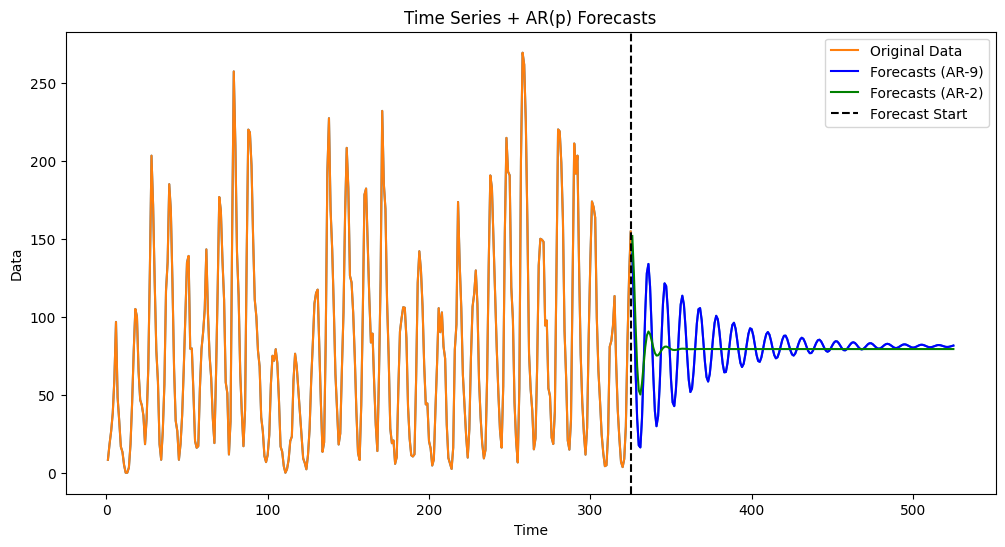

In [17]:
yhat_9 = np.concatenate([y, fcast_mean_9])
yhat_2 = np.concatenate([y, fcast_mean_2])

plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat_9, color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), fcast_mean_9, label='Forecasts (AR-9)', color='blue')
plt.plot(range(n + 1, n + k + 1), fcast_mean_2, label='Forecasts (AR-2)', color='green')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

Visually the AR(9) predictions appear better at least for the initial few predictions. 

## Stationarity of the Fitted AR models

Let us check whether the fitted AR models are causal stationary.

In [18]:
print(armd_2.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  325
Model:                     AutoReg(2)   Log Likelihood               -1505.524
Method:               Conditional MLE   S.D. of innovations             25.588
Date:                Mon, 10 Nov 2025   AIC                           3019.048
Time:                        12:45:28   BIC                           3034.159
Sample:                             2   HQIC                          3025.080
                                  325                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4561      2.372     10.308      0.000      19.806      29.106
y.L1           1.3880      0.040     34.685      0.000       1.310       1.466
y.L2          -0.6965      0.040    -17.423      0.0

The roots and their modulus are actually given as part of the above summary output (the moduli are strictly larger than 1 so this model is causal stationary). We can also compute the AR polynomial roots and their moduli as follows. 

In [19]:
#characteristic polynomial
coeffs = [(-1)*armd_2.params[2], (-1)*armd_2.params[1], 1] 
# these are the coefficients of the characteristic polynomial
roots = np.roots(coeffs) # these are the roots of the characteristic polynomial
print(coeffs)
print(roots)
magnitudes = np.abs(roots)
print(magnitudes)

[0.6964603222695153, -1.388032716491234, 1]
[0.99649088+0.66546067j 0.99649088-0.66546067j]
[1.19826206 1.19826206]


Now let us check whether the fitted AR(9) model is causal and stationary. 

In [20]:
print(armd_9.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  325
Model:                     AutoReg(9)   Log Likelihood               -1443.314
Method:               Conditional MLE   S.D. of innovations             23.301
Date:                Mon, 10 Nov 2025   AIC                           2908.628
Time:                        12:45:28   BIC                           2949.941
Sample:                             9   HQIC                          2925.132
                                  325                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7820      4.002      3.194      0.001       4.938      20.626
y.L1           1.1720      0.055     21.338      0.000       1.064       1.280
y.L2          -0.4207      0.086     -4.905      0.0

All roots have magnitudes strictly larger than 1 so this is also a causal and stationary  model. These roots and their magnitudes can also be computed as follows. 

In [21]:
# Extract coefficients for the characteristic polynomial
coeffs = [(-1) * armd_9.params[i] for i in range(9, 0, -1)] # Reverse order: lags 9→1
coeffs.append(1)
roots = np.roots(coeffs)
magnitudes = np.abs(roots)
print(magnitudes)

[1.30855577 1.30855577 1.31416814 1.31416814 1.17555576 1.17555576
 1.07010924 1.02490237 1.02490237]


These magnitudes coincide with the values in the table although the order in which they are listed in the table may be different (there is no default ordering for displaying the roots). 